# Ames Housing Project


## Project Challenge Statement

#### Goal: Predict the price of homes at sale for the Aimes Iowa Housing dataset. 

Two files used to build the model. 

- train.csv -- this data contains all of the training data for your model.
- test.csv -- this data contains the test data for your model. You will feed this data into your regression model to make predictions.

Two files will be produced in this file. 

- train_data_cleanna.csv -- this data contains all of the training data with no missing values and outliers
- test_data_cleanna.csv -- this data contains all of the testing data with no missing values and outliers

## Table of Contents 

This Notebook is broken down into different sections for analysis purpose. The following links are connected to differenct section within the Notebook for simple navigation. 

### Contents:
- [Train Data EDA](#Train-Data-EDA)
- [Train And Test Data Cleaning](#Train-And-Test-Data-Cleaning)

#### All libraries used

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Train Data EDA

## 1. Data Overall

In [2]:
#import data 
train_data = pd.read_csv("../datasets/train.csv")
test_data = pd.read_csv("../datasets/test.csv")

In [3]:
train_data.shape

(2051, 81)

In [4]:
test_data.shape

(879, 80)

In [5]:
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
def ext_cat_features(data): 
    return data.select_dtypes(exclude=[float,int]).columns 

#extract Numerical features 
def ext_num_features(data): 
    return data.select_dtypes(include=[float,int]).columns 

In [9]:
cat_col = ext_cat_features(train_data)
len(cat_col)

42

In [10]:
num_col = ext_num_features(train_data)
len(num_col)

39

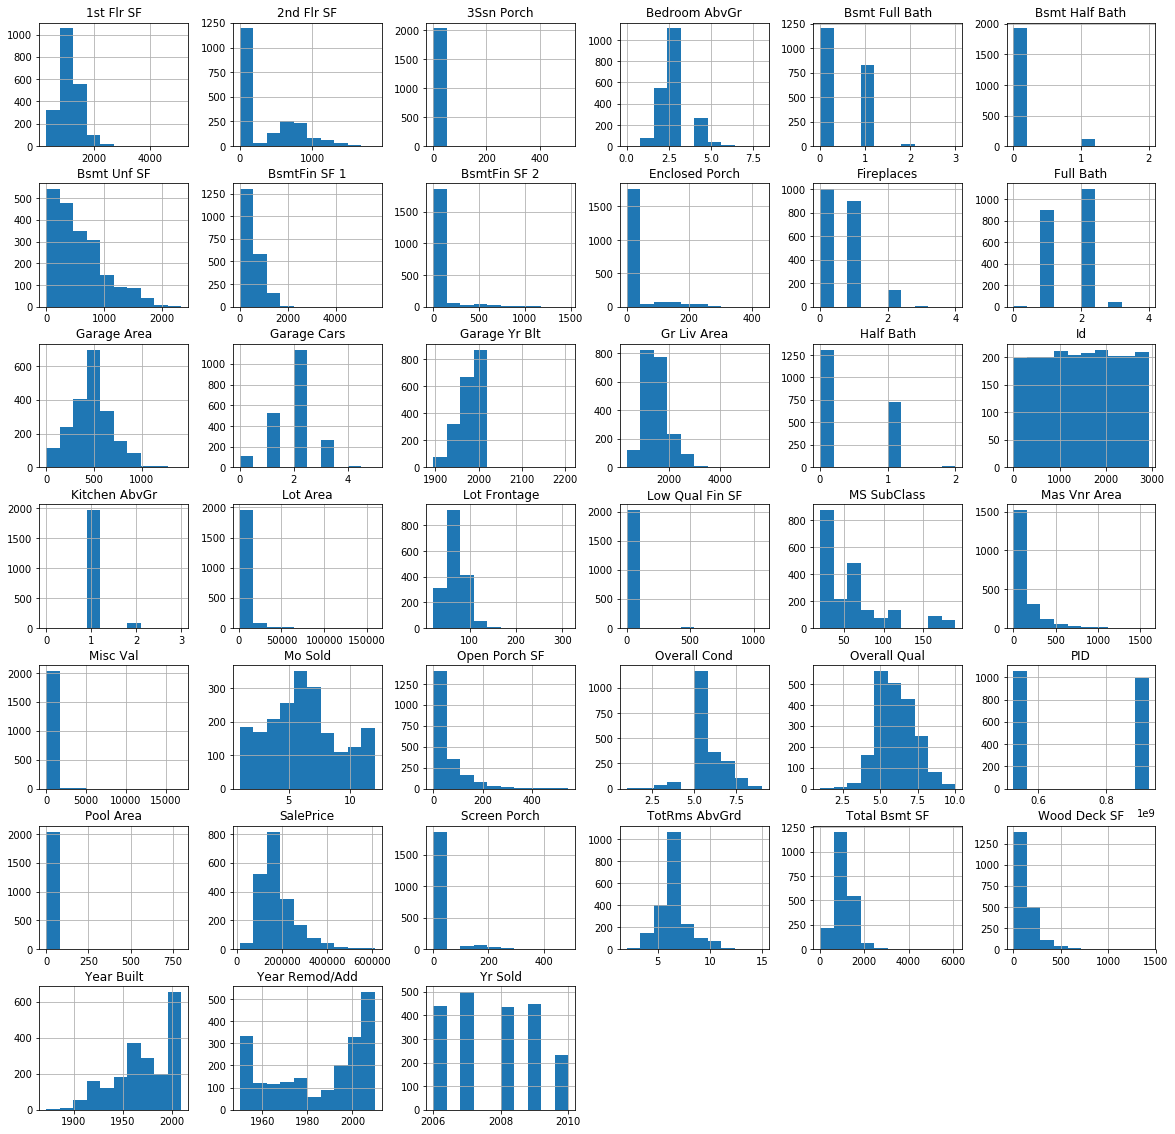

In [54]:
#Looking at each variables distribution 
train_data[num_col].hist(figsize = (20,20));

In [55]:
#creating categorical missing value boolean 
missing_value_catbool = train_data[cat_col].isnull().sum() != 0

#Select all the categorical columns with missing values
train_data[cat_col].columns[missing_value_catbool,]

Index(['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [56]:
#creating numerical  missing value boolean 
missing_value_numbool = train_data[num_col].isnull().sum() != 0

#Select all the numerical columns with missing values
train_data[num_col].columns[missing_value_numbool,]

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [57]:
#find issing value sum of each column with missing values
missing_value_bool = train_data.isnull().sum() != 0
train_data[train_data.columns[missing_value_bool,]].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

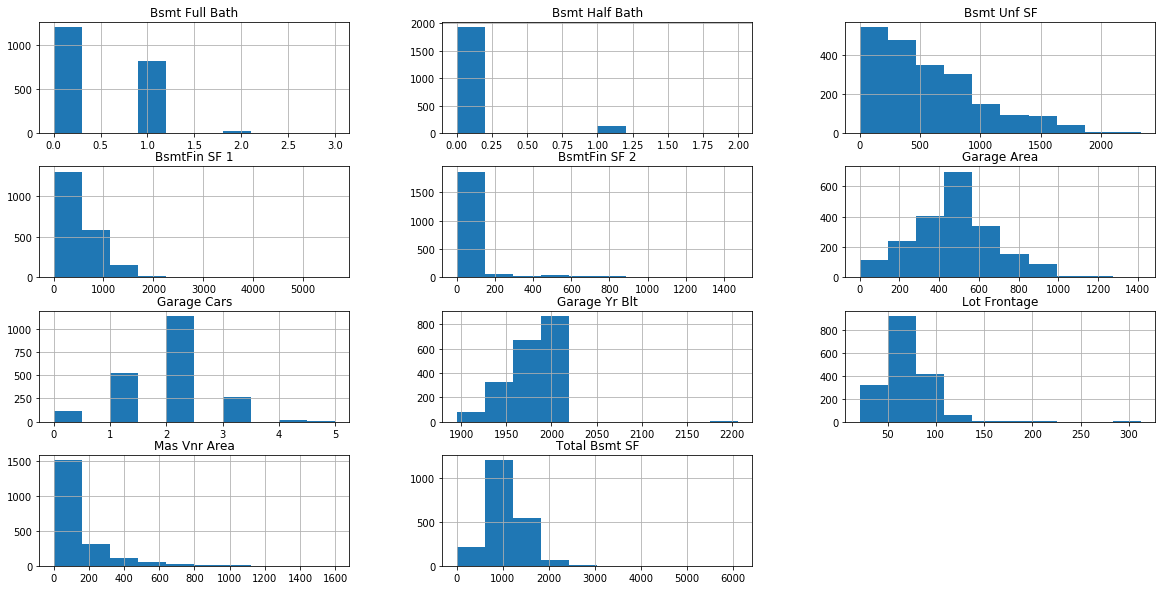

In [58]:
#Check out missing values 
train_data[train_data.columns[missing_value_bool,]].hist(figsize = (20,10));

### 2.  Data Corrlation 

### Numerical Data Corrlation

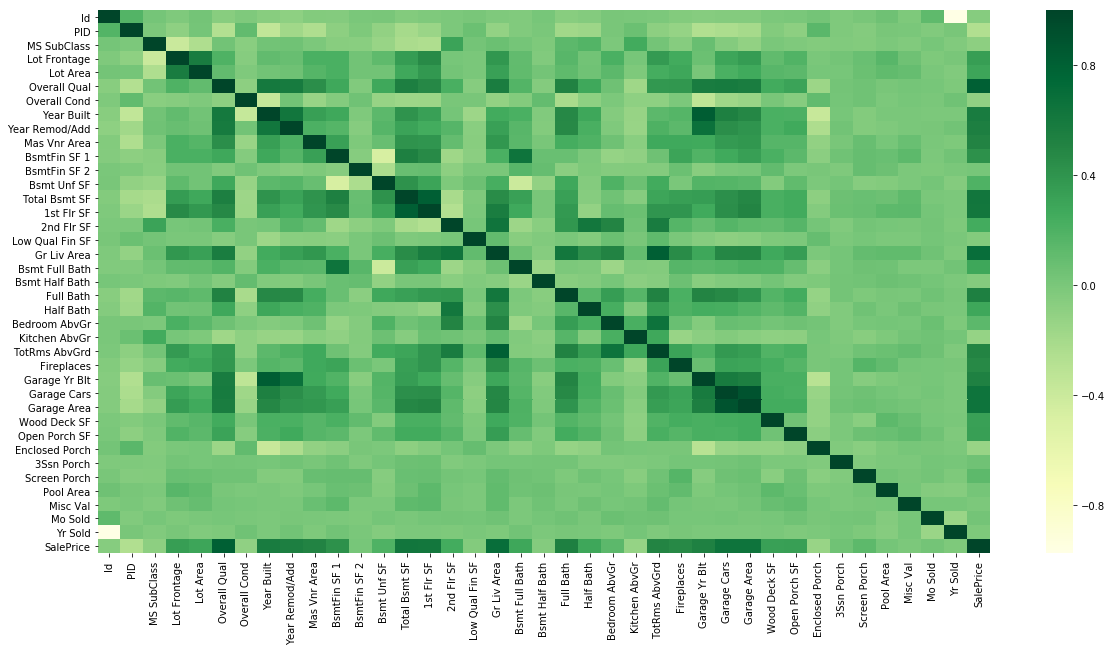

In [59]:
plt.figure(figsize = (20,10))
sns.heatmap(train_data[num_col].corr(), cmap = 'YlGn')

In [60]:
#Find Significant Numerical Values 
numeric_df = train_data[num_col].drop(columns = ["PID", "Id"])
num_bool = numeric_df.corr()[['SalePrice']].sort_values(by = 'SalePrice') > 0.3
sginificant_num_val = numeric_df.corr()[['SalePrice']][num_bool].dropna().index
sginificant_num_val

Index(['Lot Frontage', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'SalePrice'],
      dtype='object')

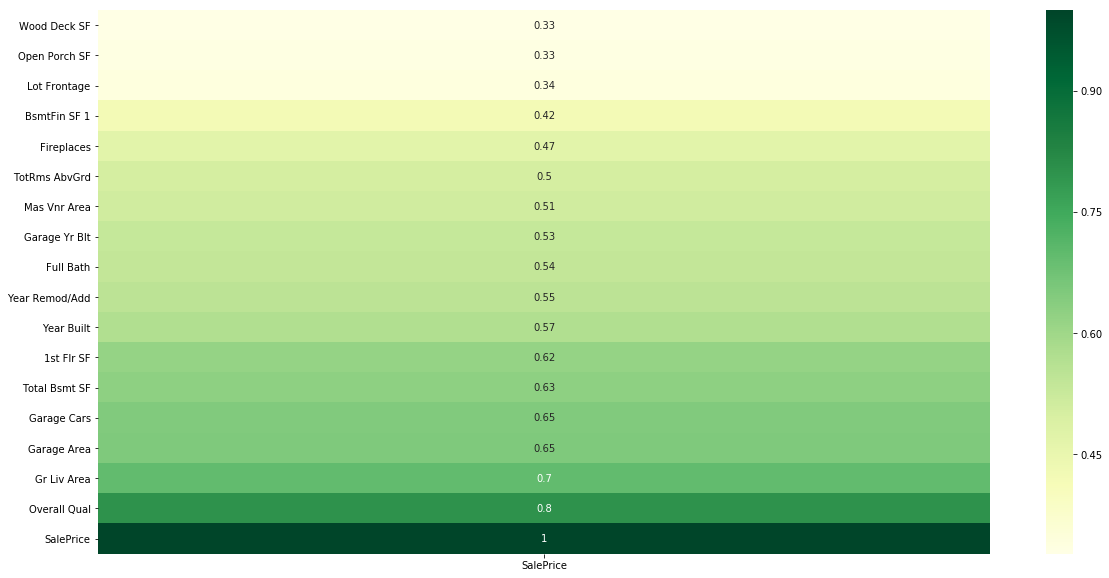

In [61]:
plt.figure(figsize = (20,10))
sns.heatmap(numeric_df[sginificant_num_val].corr()[['SalePrice']].sort_values(by = 'SalePrice'),
            annot = True, 
            cmap = 'YlGn')

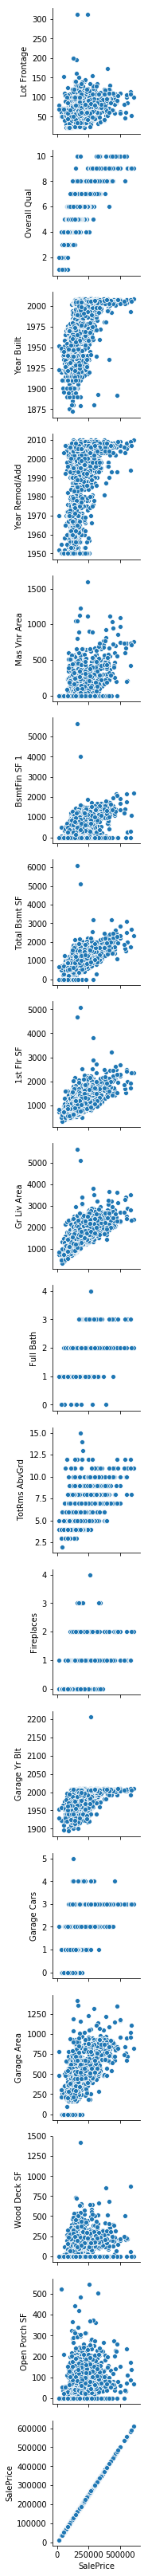

In [62]:
sns.pairplot(train_data, x_vars = ['SalePrice'], y_vars = sginificant_num_val )

### Categorical Data Correlation

In [63]:
#extract categortical data 
cat_df = train_data[cat_col]
cat_df = cat_df.join(train_data['SalePrice'])

In [64]:
cat_df.head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,SalePrice
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,130500
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,220000
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,109000
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,174000
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD,138500


In [65]:
cat_df.shape

(2051, 43)

### 3. Sale Price Data

In [66]:
train_data[['SalePrice']].describe()

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


/Users/evelyn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


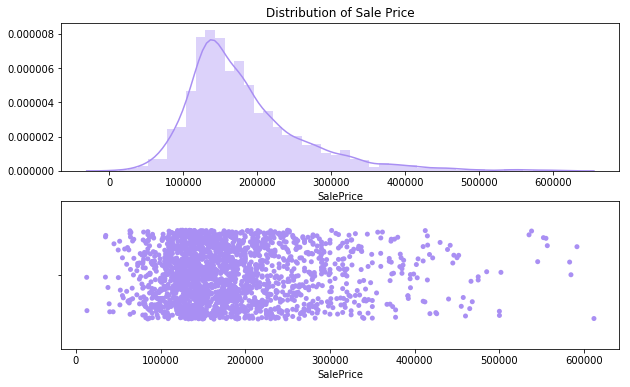

In [67]:
#plotting Sales Price 
fig, axs = plt.subplots(nrows = 2, 
                        figsize = (10,6))

ax1 = sns.distplot(train_data['SalePrice'],
             ax= axs[0],
            color = '#a98ff3',)
ax2 = sns.stripplot(train_data['SalePrice'],
             ax = axs[1],
             jitter = 0.3,
             color = '#a98ff3')
ax1.set_title("Distribution of Sale Price")
plt.savefig('../image/Distribution_of_Sale_Price.png');

In [99]:
np.log10(train_data['SalePrice'])[:5]

0    5.115611
1    5.342423
2    5.037426
3    5.240549
4    5.141450
Name: SalePrice, dtype: float64

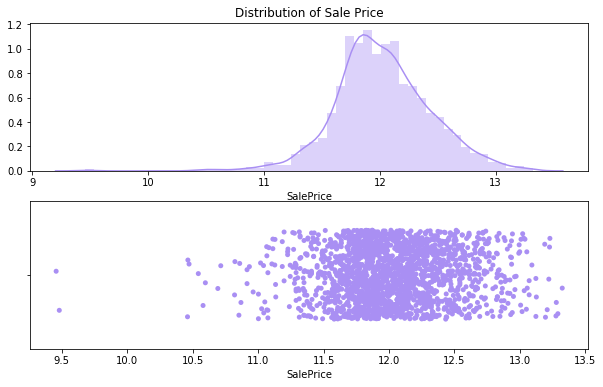

In [109]:
#plotting Sales Price with Log10(SalePrice)
fig, axs = plt.subplots(nrows = 2, 
                        figsize = (10,6))

ax1 = sns.distplot(np.log(train_data['SalePrice']),
             ax= axs[0],
            color = '#a98ff3')
        
ax2 = sns.stripplot(np.log(train_data['SalePrice']),
             ax = axs[1],
             jitter = 0.3,
             color = '#a98ff3')

ax1.set_title("Distribution of Sale Price")
plt.savefig('../image/Distribution_of_Sale_Price.png');

In [110]:
# convert to z_score for y
from scipy import stats
stats.zscore(train_data['SalePrice'])

array([-0.64305284,  0.48590632, -0.91425533, ..., -0.05649864,
       -0.47276291,  0.09487018])

/Users/evelyn/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


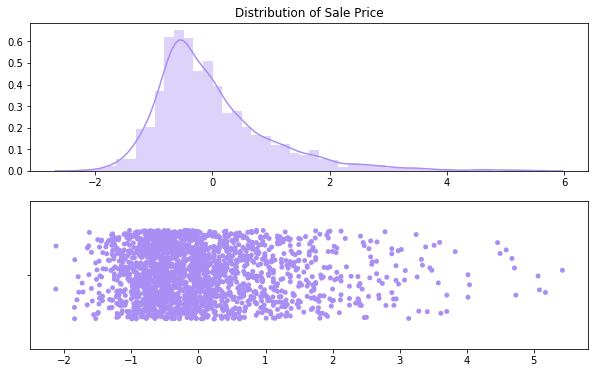

In [111]:
#plotting Sales Price with Z_score
fig, axs = plt.subplots(nrows = 2, 
                        figsize = (10,6))

ax1 = sns.distplot(stats.zscore(train_data['SalePrice']),
             ax= axs[0],
            color = '#a98ff3')
        
ax2 = sns.stripplot(stats.zscore(train_data['SalePrice']),
             ax = axs[1],
             jitter = 0.3,
             color = '#a98ff3')

ax1.set_title("Distribution of Sale Price")
plt.savefig('../image/Distribution_of_Sale_Price.png');

### 3.1 Outliers

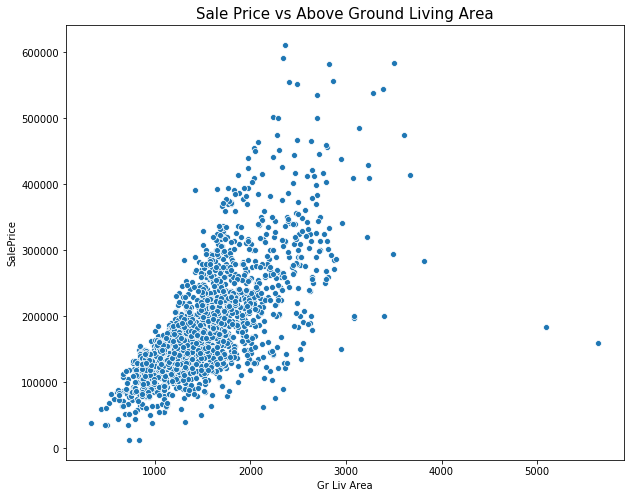

In [68]:
#plot scatterplot 
plt.figure(figsize = (10,8))
outlier = sns.scatterplot(y = train_data['SalePrice'], x = train_data['Gr Liv Area'])
plt.title("Sale Price vs Above Ground Living Area", fontsize = 15)
plt.savefig('../image/outlier.png')

In [69]:
#find outliers
train_data[train_data['Gr Liv Area']>5000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [70]:
#find outlier function 
#code reference Depy 2016 conference lecture 
def find_outlier(data):
    
    numeric_columns = data.select_dtypes(include=[float,int]).columns
    numeric_df = data[numeric_columns]
    
    outliers = []
    
    for name in numeric_columns:
        q1 = np.percentile(numeric_df[name], 25)
        q3 = np.percentile(numeric_df[name], 75)
        iqr = q1 - q3
        floor = iqr - 1.5*q1
        ceiling = iqr + 1.5*q3
        ceiling_bool = numeric_df[name] > ceiling
        floor_bool = numeric_df[name] < floor
        outlier_value = numeric_df[ceiling_bool|floor_bool][name]
        outliers.append(f'{name}{outlier_value}')
        
    return outliers

### 3.2 Neighbourhood 

In [71]:
train_data['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

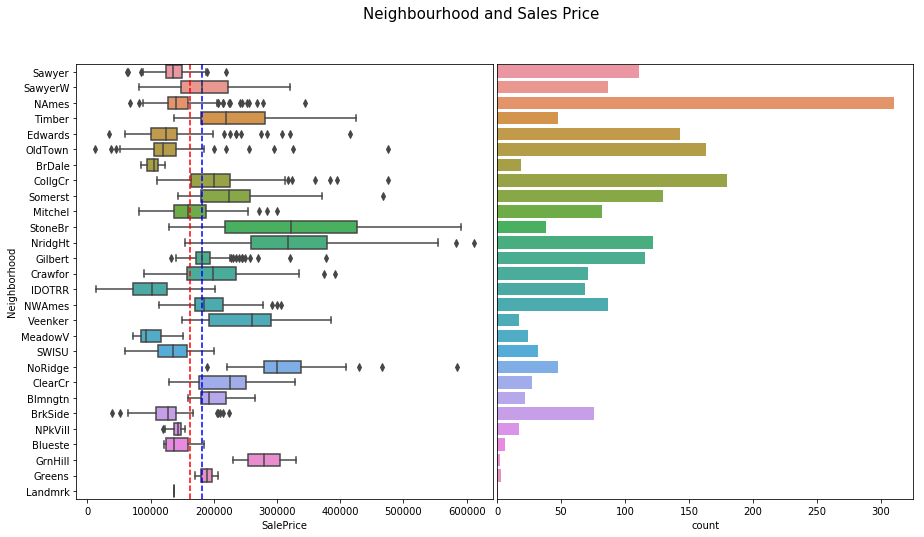

In [72]:
#plotting Sales Price 
#reference: Code helped from Berkeley Data Science 100 Class
fig, axs = plt.subplots(nrows = 1,
                        ncols = 2, 
                        figsize = (15,8))

ax1 = sns.boxplot(data = train_data, 
                  y = 'Neighborhood',
                  x = 'SalePrice',
                  ax= axs[0],
                  orient="h")

ax2 = sns.countplot(data = train_data,
                    y = 'Neighborhood',
                    ax = axs[1],
                    orient="h")
#draw mediam line 
ax1.axvline(x = train_data['SalePrice'].median(), 
            color = 'red', 
            linestyle = '--')

#draw mean line 
ax1.axvline(x = train_data['SalePrice'].mean(), 
            color = 'blue', 
            linestyle = '--')

axs[1].yaxis.set_visible(False)
plt.savefig('../image/Neighbourhood_and_Sale_Price.png')
plt.subplots_adjust(wspace=0.01)
fig.suptitle("Neighbourhood and Sales Price", fontsize = 15);

### Notes 
1. NAmes has a lot of houses due to low housing prices 
2. Brdale has fewest houses but also low housing prices
General Trend: 
- higher price, fewer houses in the neighbourhood 

## Train And Test Data Cleaning 

### Train Data Cleaning Steps 
1. build cleaning functions 
2. apply functions 
3. drop outliers 

### 1. Clean up Missing Values 

In [73]:
train_data[train_data.columns[missing_value_bool,]].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

### Cleaning Data Functions 

In [74]:
#remove Outlier Function 
def remove_outlier(data, variable, upper, lower): 
    lower_bool = data[variable] > lower
    upper_bool = data[variable] < upper
    data = data[lower_bool & upper_bool]
    
    return data 

In [75]:
#extract Categorical features 
def ext_cat_features(data): 
    return data.select_dtypes(exclude=[float,int]).columns 

#extract Numerical features 
def ext_num_features(data): 
    return data.select_dtypes(include=[float,int]).columns 

In [76]:
#fill Na function
def fill_na(data):
    cat_df = data[ext_cat_features(data)]
    cat_df_name = cat_df.columns
    
    numeric_df = data[ext_num_features(data)]
    numeric_df_name = numeric_df.columns
    
    for name in numeric_df_name: 
        fill_value_num = numeric_df[name].mean()
        numeric_df[name] = numeric_df[name].fillna(fill_value_num)
        
    for name in cat_df_name: 
        fill_value_cat = f"No_{name}"
        cat_df[name] = cat_df[name].fillna(fill_value_cat)

    return numeric_df.join(cat_df)

In [77]:
#Tryout fill_na function 
tryout = fill_na(train_data);

/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [78]:
tryout.isna().sum().sum()

0

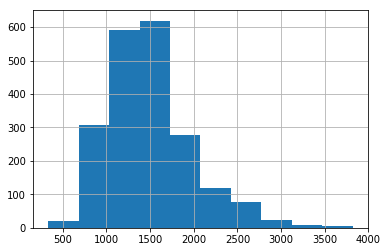

In [79]:
#try out remove outlier function 
remove_outlier(data = train_data, variable = 'Gr Liv Area', upper = 5000, lower = 0)['Gr Liv Area'].hist()

### Clean Up Training and Testing Data

Removing Outlier Only.

In [80]:
cat_df.isnull().sum()

MS Zoning            0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin Type 2      56
Heating              0
Heating QC           0
Central Air          0
Electrical           0
Kitchen Qual         0
Functional           0
Fireplace Qu      1000
Garage Type        113
Garage Finish      114
Garage Qual        114
Garage Cond        114
Paved Drive          0
Pool QC           2042
Fence             1651
Misc Feature      1986
Sale Type            0
SalePrice            0
dtype: int6

In [82]:
sign_numeric_df = numeric_df[sginificant_num_val]
sign_numeric_df.isnull().sum()

Lot Frontage      330
Overall Qual        0
Year Built          0
Year Remod/Add      0
Mas Vnr Area       22
BsmtFin SF 1        1
Total Bsmt SF       1
1st Flr SF          0
Gr Liv Area         0
Full Bath           0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
Wood Deck SF        0
Open Porch SF       0
SalePrice           0
dtype: int64

In [83]:
# clean up train_data 
train_data = remove_outlier(data = train_data, variable = 'Gr Liv Area', upper = 5000, lower = 0)
train_data = fill_na(train_data)

/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [84]:
# clean up train_data 
test_data = remove_outlier(data = test_data, variable = 'Gr Liv Area', upper = 5000, lower = 0)
test_data = fill_na(test_data)

/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [87]:
print(train_data['Gr Liv Area'].describe())
print(train_data.isnull().sum().sum())

count    2049.000000
mean     1495.553441
std       485.783577
min       334.000000
25%      1128.000000
50%      1444.000000
75%      1728.000000
max      3820.000000
Name: Gr Liv Area, dtype: float64
0


In [88]:
print(test_data['Gr Liv Area'].describe())
print(test_data.isnull().sum().sum())

count     879.000000
mean     1500.531286
std       517.413260
min       407.000000
25%      1114.000000
50%      1436.000000
75%      1781.000000
max      4676.000000
Name: Gr Liv Area, dtype: float64
0


In [89]:
train_data.to_csv('../datasets/train_data_cleanna.csv')
test_data.to_csv('../datasets/test_data_cleanna.csv')